# Using Python to assess and visualize temporal patterns in charging behavior related to electric vehicles: A time-series data exploration.

## Background: Data on household electricity usage are provided in 30 minute intervals over a two month period. In addition to continuous measurements of electricty usage, each time interval is labeled as 0 (no charging activity occurred over that interval) or 1 (charging occurred for at least part of the interval.

In [128]:
import pandas as pd
import numpy as np
import os 
from os import listdir

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

os.chdir('/Users/DHA/Dropbox/Private/Data Science/GridCure/EV_files')
print(os.getcwd()); print(os.listdir())

/Users/DHA/Dropbox/Private/Data Science/GridCure/EV_files
['Electric Vehicle Detection-1.docx', 'EV_test.csv', 'EV_train.csv', 'EV_train_labels.csv', 'sample_submission.csv']


## Perform visual inspection of the data to assess file organization and data types

In [18]:
EV_train = pd.read_csv("EV_train.csv")
EV_train_label = pd.read_csv("EV_train_labels.csv")
EV_test = pd.read_csv("EV_test.csv")

EV_train.head()
EV_train_label.head()
EV_test.head()

,House ID,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
0,11655099,0.950,0.826,0.361,0.238,0.342,0.233000,0.351000,0.194000,0.292000,...,0.664,0.783,0.601,0.639,0.417,0.439,0.226,0.190,0.710,0.728
1,11633257,0.353,0.327,0.358,0.292,0.285,0.304000,0.361000,0.342000,0.355000,...,0.536,0.558,0.622,0.634,0.513,0.421,0.273,0.296,0.291,0.289
2,11651552,0.150,0.181,0.150,0.150,0.131,0.125000,0.088000,0.106000,0.094000,...,2.125,0.881,0.481,1.194,0.138,0.119,0.038,0.088,0.056,0.113
3,11636092,2.088,2.075,2.121,2.098,2.046,2.081000,1.847000,0.420000,0.399000,...,0.620,0.487,0.563,0.419,0.379,0.359,0.347,0.325,0.330,0.340
4,11647239,1.416,1.250,1.270,1.258,1.239,1.753105,4.609256,4.619256,4.075151,...,1.596,1.667,1.569,1.664,1.580,1.635,1.568,1.565,1.575,1.571


,House ID,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
0,11655099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11633257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11651552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11636092,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11647239,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


,House ID,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
0,11643173,1.013,0.215,0.217,0.217,0.217,0.220,0.220,0.215,0.215,...,1.059,0.308,1.248,0.236,0.206,0.210,0.218,0.219,0.909,0.202
1,11655020,1.325,1.413,0.813,0.588,0.213,0.175,0.163,0.200,0.175,...,0.750,0.625,0.450,1.325,0.350,0.313,0.188,0.200,0.188,0.175
2,11644367,1.543,1.636,1.683,1.556,1.935,2.393,2.601,2.709,2.590,...,2.208,2.423,2.458,2.487,2.354,2.444,2.430,2.275,1.914,1.497
3,11633356,0.153,0.123,0.146,0.101,0.140,0.108,0.121,0.127,0.110,...,0.216,0.237,0.213,0.258,0.275,0.219,0.218,0.079,0.049,0.055
4,11649905,0.187,0.004,0.004,0.004,0.004,0.004,0.005,0.004,0.004,...,0.004,0.005,0.526,0.005,0.004,0.004,0.004,0.004,0.004,0.004


## Begin a sequence involving the reshaping of Panda's dataframe objects needed to coerce data into usable format for group aggregations and ultimately machine learning analysis

In [129]:
melted_train = pd.melt(EV_train, id_vars='House ID')
melted_label = pd.melt(EV_train_label, id_vars= 'House ID')
melted_test = pd.melt(EV_test, id_vars='House ID')

# melted_train.head()
# melted_label.head()
# melted_test.head()

In [132]:
pivot_train = melted_train.pivot(index='variable', columns = 'House ID', values = 'value')
pivot_label = melted_label.pivot(index='variable', columns = 'House ID', values = 'value')
pivot_test = melted_test.pivot(index='variable',columns='House ID', values='value')

# pivot_train.head()
# pivot_label.head()
# pivot_test.head()

In [22]:
pivot_train_sort = pivot_train.reindex_axis(sorted(pivot_train.index, key=lambda x: float(x[9:])), axis = 0)
pivot_label_sort = pivot_label.reindex_axis(sorted(pivot_label.index, key=lambda x: float(x[9:])), axis = 0)
pivot_test_sort = pivot_test.reindex_axis(sorted(pivot_test.index, key=lambda x: float(x[9:])), axis=0)

# pivot_train_sort.head()
# pivot_label_sort.head()
# pivot_test_sort.head()

In [133]:
rng = pd.date_range('1/1/2016', periods=2880, freq='30min')
#ts = pivot2.set_index(rng)

train_ts = pivot_train_sort.set_index(rng)
label_ts = pivot_label_sort.set_index(rng)
test_ts = pivot_test.set_index(rng)

In [24]:
train_ts_flipped = train_ts.T
train_ts_flipped['house_index'] = train_ts_flipped.index
train_ts_melt = pd.melt(train_ts_flipped, id_vars='house_index')
# train_ts_melt.head()

label_ts_flipped = label_ts.T
label_ts_flipped['house_index'] = label_ts_flipped.index
label_ts_melt = pd.melt(label_ts_flipped, id_vars='house_index')
# label_ts_melt.head()

train_merged = pd.merge(train_ts_melt, label_ts_melt, on=['house_index', 'variable'])
train_merged.columns = ['house_index', 'variable', 'value','label']
train_merged.head(10)

,house_index,variable,value,label
0,11628280,2016-01-01,1.114,0
1,11628291,2016-01-01,0.728,0
2,11628301,2016-01-01,0.166,0
3,11628319,2016-01-01,0.712,0
4,11628335,2016-01-01,0.926,0
5,11628338,2016-01-01,0.653,0
6,11628340,2016-01-01,1.294,0
7,11628343,2016-01-01,0.629,0
8,11628352,2016-01-01,0.123,0
9,11628366,2016-01-01,0.053,0


In [26]:
train_merged.set_index(pd.DatetimeIndex(train_merged['variable']), inplace=True)

train_merged['roll_1hr'] = train_merged.groupby(['house_index'])['value'].transform(lambda x: x.rolling(window='1h',min_periods=2).mean().shift(1))
train_merged['roll_1hr_d'] = train_merged['value'] - train_merged['roll_1hr']

week_shift = 7*24*2
train_merged['roll_1wk'] = train_merged.groupby(['house_index'])['value'].transform(lambda x: x.rolling(window='1h',min_periods=2).mean().shift(336))
train_merged['roll_1wk_d'] = train_merged['value'] - train_merged['roll_1wk']

# train_merged[train_merged['house_index']==11628319].head(340)

train_merged_ex = train_merged[train_merged['house_index']==11647239]

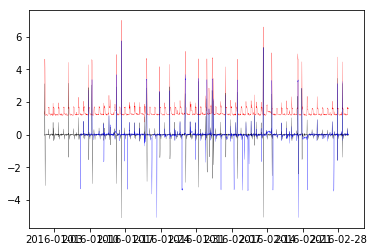

In [90]:
plt.plot(train_merged_ex['value'],color='red',linewidth=0.2)
plt.plot(train_merged_ex['roll_1hr_d'],color='black',linewidth=0.2)
plt.plot(train_merged_ex['roll_1wk_d'],color='blue',linewidth=0.2)
plt.show()

# plt.figure()
# plt.plot(train_merged_ex['roll_1wk_d'],color='blue',linewidth=0.2)
# plt.show()

## Plot electricity usage for an example household that has an electric vehicle

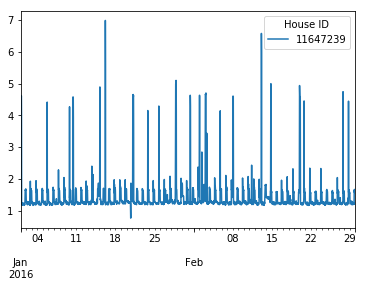

In [134]:
charge_ex = train_ts[[11647239]]
label_ex = label_ts[[11647239]]
plt.figure(); charge_ex.plot();

In [136]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
series = charge_ex

#tsx = pd.Series(charge_ex[11647239].values, index=charge_ex['DateTime'])
DOW = pd.Series(rng.weekday,rng).map(pd.Series('Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split()))
#DOW.head()
DOW_df = pd.DataFrame(DOW)
DOW_df['DateTime']=DOW_df.index
DOW_df['Hour'] = DOW_df.index.hour
DOW_df.rename(index=str,columns={0: "Day_of_Week"}, inplace=True)
# DOW_df.head()

tsx2 = pd.concat([charge_ex, DOW], axis=1)
tsx2.rename(index=str, columns={0: "Day_of_Week"},inplace=True)

dow_groups = tsx2.groupby('Day_of_Week').mean()

## Show Pandas DataFrame in long format that now contains a corresponding Day of Week and Hour variable for each 30 minute interval

In [31]:
tsxz = pd.DataFrame(train_merged['label'].values,index=train_merged['variable'])
tsxz['DateTime'] = tsxz.index

tsxz.rename(index=str, columns={0: "label"},inplace=True)
tsxz2 = pd.merge(tsxz, DOW_df, on='DateTime')
print(tsxz2.tail());

         label            DateTime Day_of_Week  Hour
4579195      0 2016-02-29 23:30:00      Monday    23
4579196      0 2016-02-29 23:30:00      Monday    23
4579197      0 2016-02-29 23:30:00      Monday    23
4579198      0 2016-02-29 23:30:00      Monday    23
4579199      0 2016-02-29 23:30:00      Monday    23


## Plot the daily and hourly distribution of electric vehicle charging instances aggregated over the two month period

Day_of_Week  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
Hour                                                                       
0               457     491       385     421       457      426        435
1               509     464       326     344       451      467        454
2               499     449       272     254       447      447        485
3               477     439       240     183       469      461        550
4               463     433       192     161       483      499        539
Day_of_Week  Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
Hour                                                                       
0               421     491      426        435       457     457       385
1               344     464      467        454       451     509       326
2               254     449      447        485       447     499       272
3               183     439      461        550       469     477       240
4           

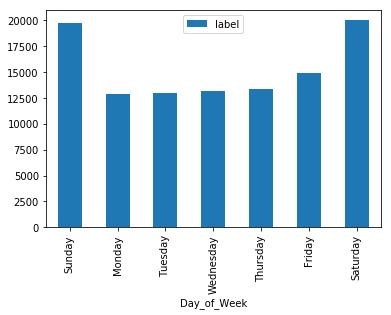

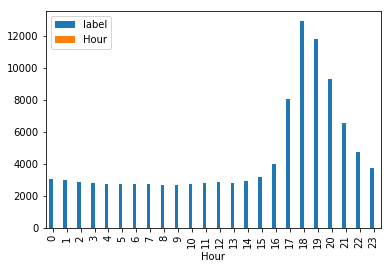

In [32]:
dow_groups_sum = tsxz2.groupby('Day_of_Week').label.sum()
dow_groups_sum.head()

plt.figure()
dow_hist = pd.DataFrame(dow_groups_sum)
dow_hist['Day_of_Week'] = dow_hist.index
dow_hist.head()
dow_hist = dow_hist.reindex(["Sunday","Monday","Tuesday",'Wednesday',"Thursday","Friday","Saturday"])
#dow_hist.sort_values('Day_of_Week',inplace=True)
dow_hist.plot.bar()


hour_groups = tsxz2.groupby('Hour').label.sum()
hour_groups.head()

plt.figure()
hour_hist = pd.DataFrame(hour_groups)
hour_hist['Hour'] = hour_hist.index
hour_hist.head()
hour_hist.sort_values('Hour',inplace=True)
hour_hist.plot.bar()

#day_hour_groups = tsxz2.groupby(['Day_of_Week','Hour']).label.sum()
day_hour_groups = pd.pivot_table(tsxz2, values='label', index=['Hour'], columns=['Day_of_Week'], aggfunc=np.sum)
print(day_hour_groups.head())

day_hour = pd.DataFrame(day_hour_groups)
day_hour = day_hour[["Sunday","Monday","Tuesday",'Wednesday',"Thursday","Friday","Saturday"]]
print(day_hour.head(24));

# Visualize matrix plot simultaneously depicting daily and hourly patterns in electric vehicle charging activity. 

### Plot interpretation: vast majority of charging instances occur over the weekends (row index 0 = Sunday, 5 = Friday, 6 = Saturday) and between  6 PM and 9 PM

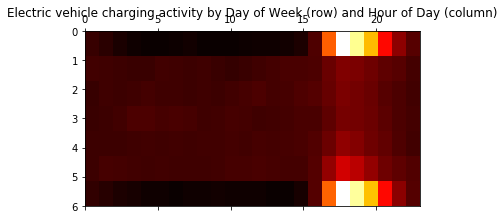

(7, 24)


In [85]:
#plot sum of half-hour charge counts by time and day of week
fig, ax = pyplot.subplots(figsize=(6,6))
pyplot.title('Electric vehicle charging activity by Day of Week (row) and Hour of Day (column)', y= 2)
ax.matshow(np.transpose(day_hour), interpolation=None, aspect='auto', 
               cmap = 'hot',extent=[0,23,6,0])
ax.set_aspect(2)
pyplot.show()
print(np.transpose(day_hour).shape)

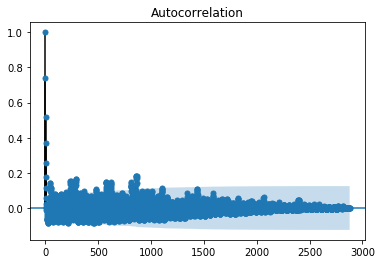

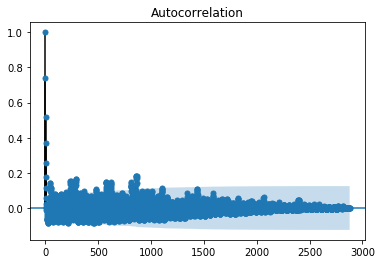

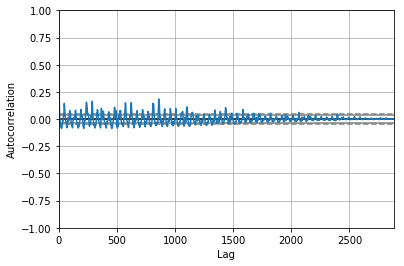

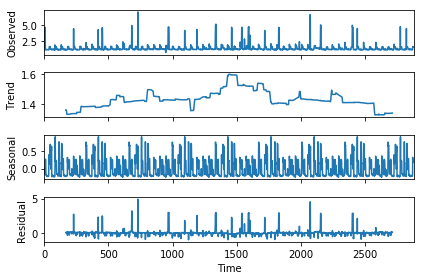

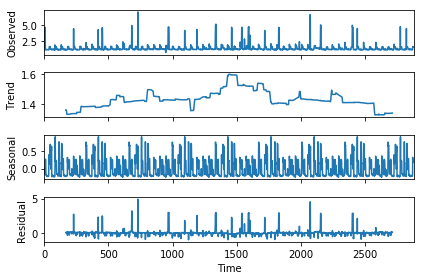

In [137]:
from pandas import Series
import numpy as np
import statsmodels.api as statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(charge_ex)
pyplot.show()

from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(charge_ex)
pyplot.show()

from statsmodels.tsa.seasonal import seasonal_decompose
decompfreq = 336 #(24*7)/0.5
seas_ex = charge_ex.set_index(rng)
result = seasonal_decompose(seas_ex.values, model='additive',freq=336)
result.plot()

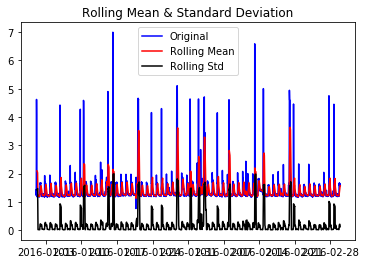

Results of Dickey-Fuller Test:
Test Statistic                -1.810396e+01
p-value                        2.548822e-30
#Lags Used                     3.000000e+00
Number of Observations Used    2.876000e+03
Critical Value (1%)           -3.432626e+00
Critical Value (5%)           -2.862545e+00
Critical Value (10%)          -2.567305e+00
dtype: float64


In [477]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    #dftest = adfuller(timeseries, autolag='AIC')
    dftest = adfuller(timeseries.values.ravel(),autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(charge_ex)

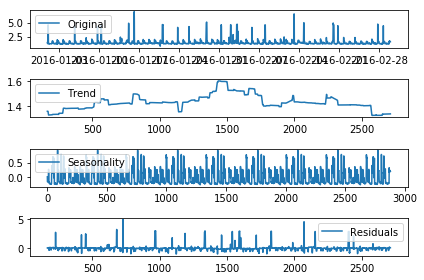

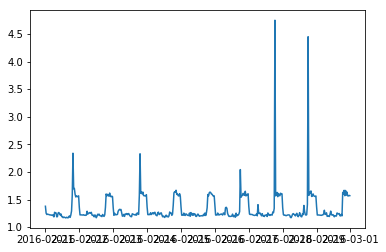

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(charge_ex.values, model='additive',freq=336)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411);
plt.plot(charge_ex, label='Original')
plt.legend(loc='best')
plt.subplot(412);
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413);
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414);
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout();

trunc = charge_ex.truncate(before='2/21/2016')
plt.figure();
plt.plot(trunc, label='trunc')
plt.show();

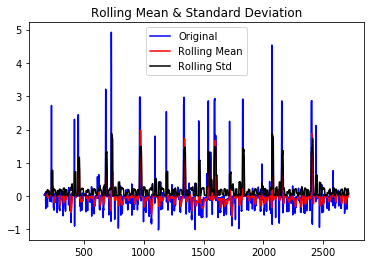

Results of Dickey-Fuller Test:
Test Statistic                -1.740884e+01
p-value                        4.899039e-30
#Lags Used                     3.000000e+00
Number of Observations Used    2.540000e+03
Critical Value (1%)           -3.432927e+00
Critical Value (5%)           -2.862679e+00
Critical Value (10%)          -2.567376e+00
dtype: float64


In [482]:
ts_log_decompose = pd.DataFrame(residual)
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

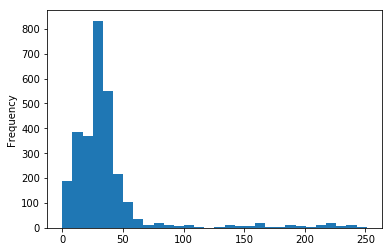

In [37]:
#histogram for count of charging instances among homes in training set
plt.figure()
label_ts.sum(axis=1).plot.hist(bins=30)

In [124]:
#select columns where column sums exceed 1
has_vehicle = label_ts.loc[:,  (label_ts.sum() > 1)]
# tsx_v = pd.DataFrame(has_vehicle.values,index=DOW_df['DateTime'])
# #tsx_v = pd.concat([has_vehicle, DOW], axis=1)
# #tsx_v.rename(index=str, columns={0: "Day_of_Week"},inplace=True)
# # tsx_v.head()
# 
# groups_v = tsx_v.groupby(TimeGrouper('D'))

In [122]:
# days = DataFrame()
# for name, group in groups_v:
# 	days[name.day] = group.values
# days = days.T
# pyplot.matshow(days, interpolation=None, aspect='auto')
# EV_train_labelpyplot.show()

In [39]:
charge_count = melted_label.groupby('House ID').value.sum()
EV_homes = charge_count[charge_count>=1]
EV_homes_list = charge_count.index.tolist()

## Create function to graph a). continous electricity usage alongside b). labeled charging instances for a randomly selected household over a one week period

In [40]:
import random2 as random
def plot_random(start_date):
    start_time = pd.to_datetime(start_date)
    end_time = start_time + pd.DateOffset(3)
    random_house = random.choice(EV_homes_list)
    charge_ex = train_ts[[random_house]][start_time:end_time]
    label_ex = label_ts[[random_house]][start_time:end_time]
    charge_ex.plot() 
    label_ex.plot()
    plt.legend(loc='best')

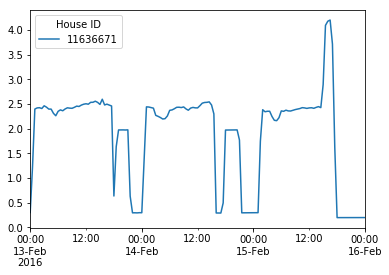

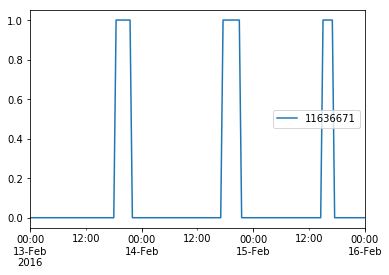

In [45]:
plot_random('2/13/2016')

## Additional resources

In [139]:
#references
#http://www.cs.usfca.edu/~srollins/pubs/igcc14.pdf
#http://web.eecs.utk.edu/~leparker/publications/Energy-Buildings-2012.pdf
#http://www.kdnuggets.com/2016/11/implementing-cnn-human-activity-recognition-tensorflow.html/2